Epoch 1/100


/Users/isabellacastillo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - loss: 15521.8789 - val_loss: 1809.6531
Epoch 2/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - loss: 1751.9792 - val_loss: 1781.0742
Epoch 3/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - loss: 1724.2979 - val_loss: 1710.8999
Epoch 4/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 1686.7698 - val_loss: 1725.6226
Epoch 5/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - loss: 1676.4131 - val_loss: 1681.6161
Epoch 6/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - loss: 1645.1976 - val_loss: 1701.0970
Epoch 7/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - loss: 1653.7961 - val_loss: 1691.3655
Epoch 8/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 402us/step - loss: 1662.7832 - val_loss: 1690.2067
Epoch 9/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - loss: 1643.1537 - val_loss: 1670.6027
Epoch 10/100
2176/2176 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 1652.8005 - val_loss: 1654.3569
Epoch 11/100
2176/2176 ━━━━━━━━━━━━━━━━━

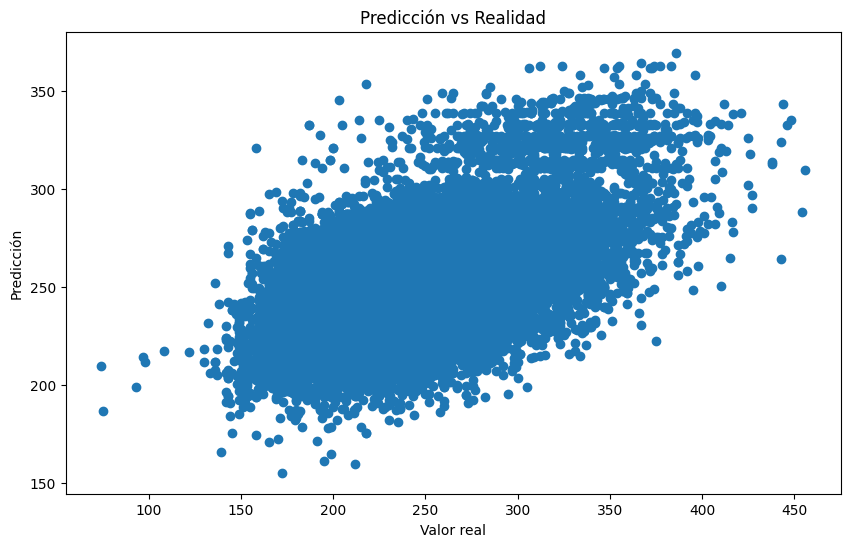

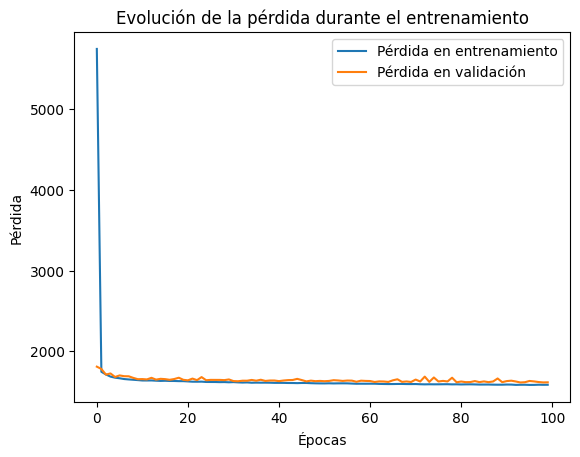

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("Base_Limpia.xlsx")

# Manejo de fechas (calculando edad)
df['estu_fechanacimiento'] = pd.to_datetime(df['estu_fechanacimiento'], errors='coerce', format='%d/%m/%y')
df = df[df['estu_fechanacimiento'].notna()]

# Convertir el periodo a fecha (primer día del mes)
def periodo_a_fecha(periodo):
    periodo_str = str(periodo)
    anio = int(periodo_str[:4])
    mes = int(periodo_str[4:])
    return datetime(anio, mes, 1)

df['fecha_examen'] = df['periodo'].apply(periodo_a_fecha)

# Calcular la edad al momento del examen
df['edad_examen'] = df.apply(lambda row: relativedelta(row['fecha_examen'], row['estu_fechanacimiento']).years, axis=1)

# Selección de columnas
categorical_columns = [
    'cole_area_ubicacion', 'cole_caracter', 'cole_bilingue', 'cole_jornada',
    'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora', 'fami_tieneautomovil','fami_estratovivienda','fami_personashogar'
]

numerical_columns = [
    'edad_examen'
]

# Manejar valores faltantes
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Eliminar o rellenar NaN en 'punt_global'
df = df.dropna(subset=['punt_global'])  # O usa df['punt_global'].fillna(df['punt_global'].mean())

# Codificar variables categóricas
encoder = OrdinalEncoder()
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

# Normalizar variables numéricas
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Preparar las variables predictoras y la variable objetivo
X = df[categorical_columns + numerical_columns]
y = df['punt_global']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo de red neuronal
model = Sequential()

# Capa de entrada
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Capas ocultas
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Capa de salida
model.add(Dense(1, activation='linear'))  # 'linear' porque es regresión

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en los datos de prueba: {loss:.4f}')

# Realizar predicciones
y_pred = model.predict(X_test)

# Visualizar las predicciones frente a los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Predicción vs Realidad')
plt.show()

# Graficar la evolución de la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.show()


544/544 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


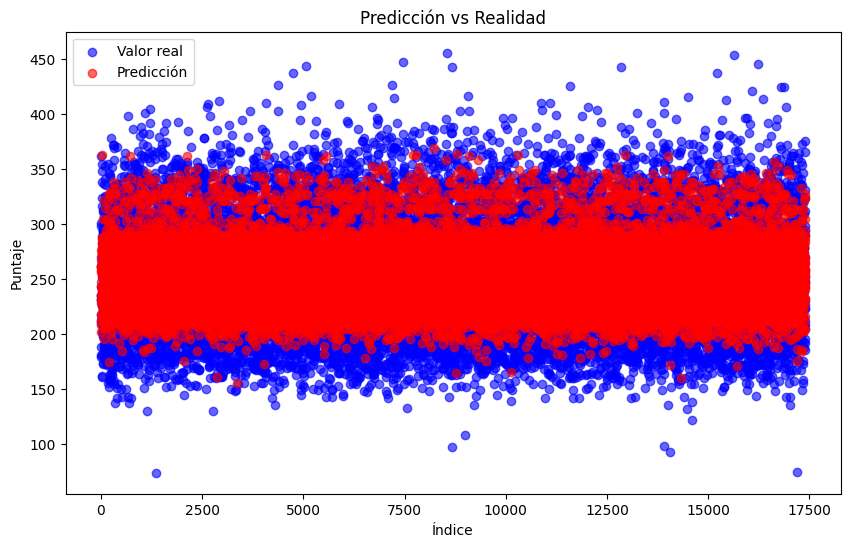

In [11]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar valores reales en azul
plt.scatter(range(len(y_test)), y_test, color='blue', alpha=0.6, label='Valor real')

# Graficar valores predichos en rojo
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Predicción')

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Puntaje')
plt.title('Predicción vs Realidad')

# Agregar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


In [12]:
print(df.columns)

Index(['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue',
       'cole_calendario', 'cole_caracter', 'cole_genero', 'cole_jornada',
       'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_nombre_establecimiento', 'cole_nombre_sede',
       'cole_sede_principal', 'estu_depto_presentacion', 'estu_depto_reside',
       'estu_estadoinvestigacion', 'estu_fechanacimiento', 'estu_genero',
       'estu_mcpio_presentacion', 'estu_mcpio_reside', 'estu_nacionalidad',
       'estu_pais_reside', 'estu_privado_libertad', 'fami_cuartoshogar',
       'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda',
       'fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador',
       'fami_tieneinternet', 'fami_tienelavadora', 'desemp_ingles',
       'punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas',
       'punt_c_naturales', 'punt_lectura_critica', 'punt_global',
       'fecha_examen', 'edad_examen'],
      dtype='object')
